In [83]:
import numpy as numpy
import pandas as pd


In [84]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")


In [85]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4803,ham,"Er, hello, things didnâ°ÃÃ·t quite go to pla...",NaN,NaN,NaN
3634,ham,It's not that you make me cry. It's just that ...,NaN,NaN,NaN
334,spam,Valentines Day Special! Win over Ã¥Â£1000 in o...,NaN,NaN,NaN
3235,ham,Aight text me when you're back at mu and I'll ...,NaN,NaN,NaN
174,ham,"Well, i'm gonna finish my bath now. Have a goo...",NaN,NaN,NaN


In [86]:
df.shape

(5572, 5)

In [87]:
# 1) data cleaning
#2) EDA
# 3) text preprocesing
# 4) modle building
# 5) evaluation
# 6) improvements
# 7) website
# 8) depl0y

DATA CLEANING

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [90]:
df.sample(5)

,v1,v2
3494,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
4576,spam,Had your contract mobile 11 Mnths? Latest Moto...
4310,ham,It so happens that there r 2waxsto do wat you ...
3158,ham,Are you up for the challenge? I know i am :)
3366,ham,Hey what are you doing. Y no reply pa..


In [91]:
# renamming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [92]:
df.sample(5)

,target,text
4943,ham,Wrong phone! This phone! I answer this one but...
1967,ham,Even i cant close my eyes you are in me our va...
1369,ham,Did you try making another butt.
5248,ham,U come n search tat vid..not finishd..
2110,ham,Do we have any spare power supplies


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [94]:
df['target']=encoder.fit_transform(df['target'])

In [95]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
## check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [97]:
# check for duplicate values
df.duplicated().sum()

403

In [98]:
df=df.drop_duplicates(keep='first')

In [99]:
df.shape

(5169, 2)

In [100]:
######################exploratory data analysisa##############################

In [101]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20e7dbcebd0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

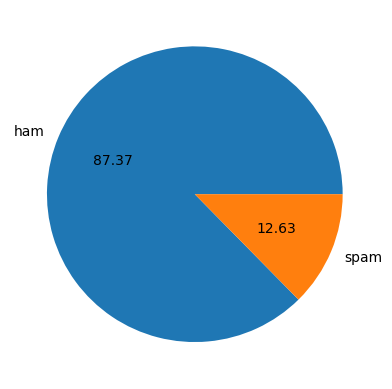

In [102]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [103]:
##data is imbalanced


In [104]:
# %pip install nltk
%pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [105]:
import nltk

In [106]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
df.columns

Index(['target', 'text'], dtype='object')

In [108]:
df['num_characters']=df['text'].apply(len)

In [109]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [110]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [111]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [112]:
# num of setences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [114]:
df.columns


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [115]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.200813,18.456761,1.966531
std,58.387510,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [116]:
######these are ham (non spam messages)
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.591231,17.123782,1.820195
std,56.406061,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
######these are  ( spam messages)
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.978560
std,30.419480,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

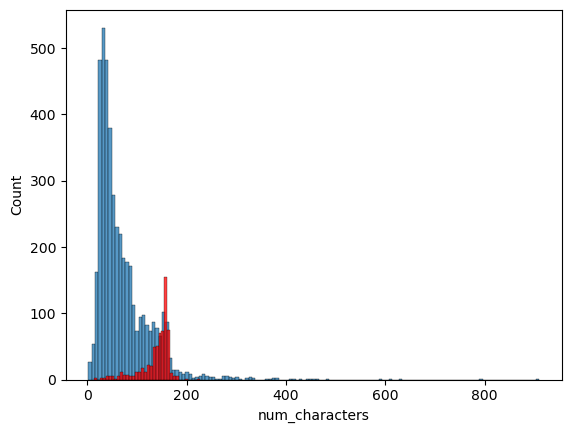

In [118]:
########spam messeges avg is larger than ham messeges
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


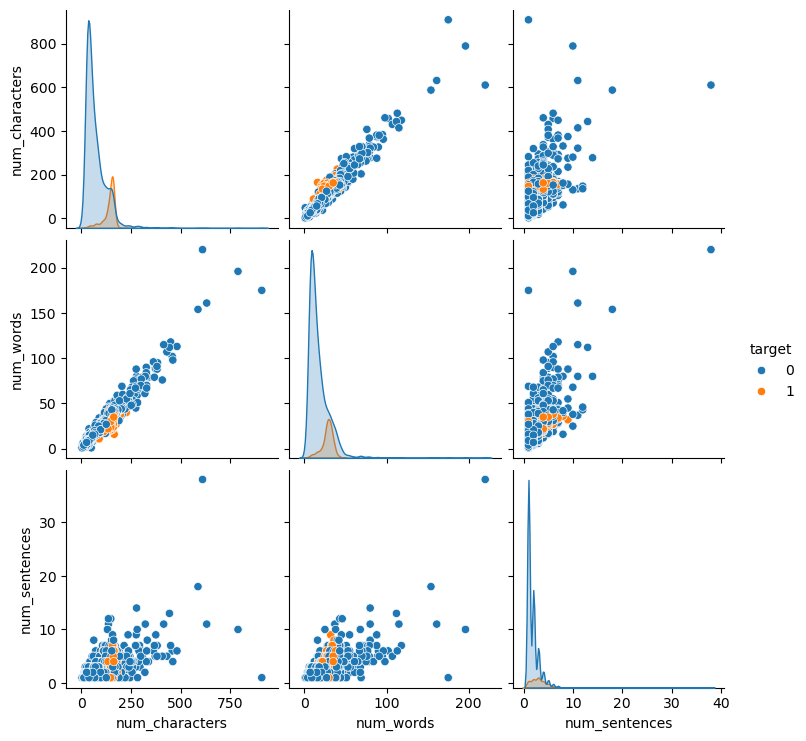

In [119]:
sns.pairplot(df,hue='target')

<Axes: >

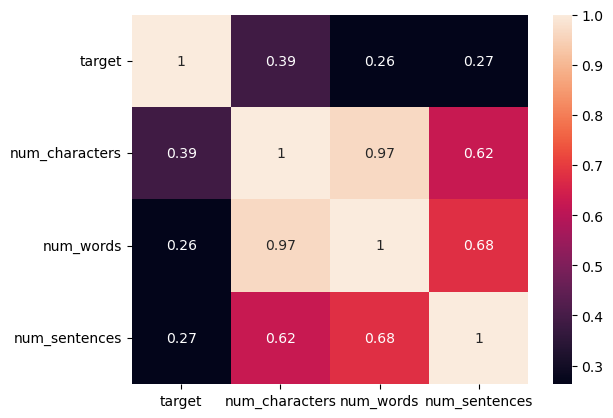

In [120]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

DATA PREPROCESSING
    lowercase
    tokenization
    removing special chaarachters
    removing step words and punctuation
    stemming

In [121]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
import string


In [123]:


# stopwords.words('english')

In [124]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [125]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [126]:
# df['text'][10]

In [127]:
df['transformed_text']=df['text'].apply(transform_text)

In [128]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [129]:
%pip install nltk wordcloud
import nltk

from wordcloud import WordCloud
nltk.download('punkt')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [131]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

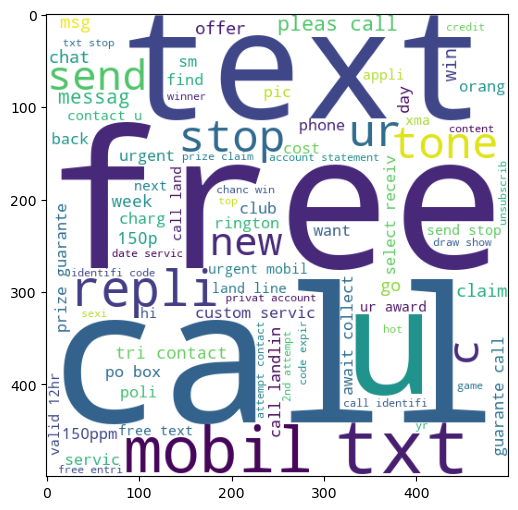

In [132]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [133]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

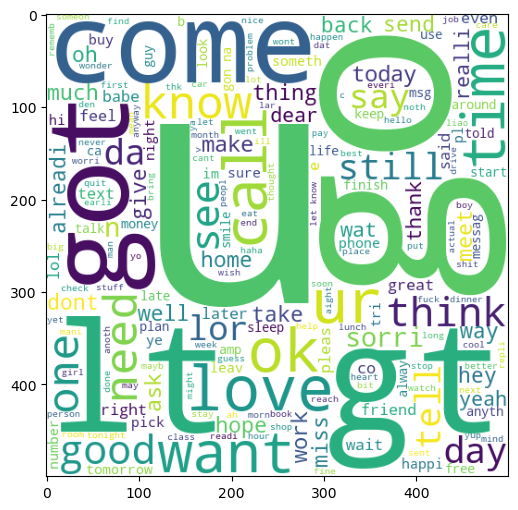

In [134]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [135]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [136]:
len(spam_corpus)

9936

In [137]:
from collections import Counter

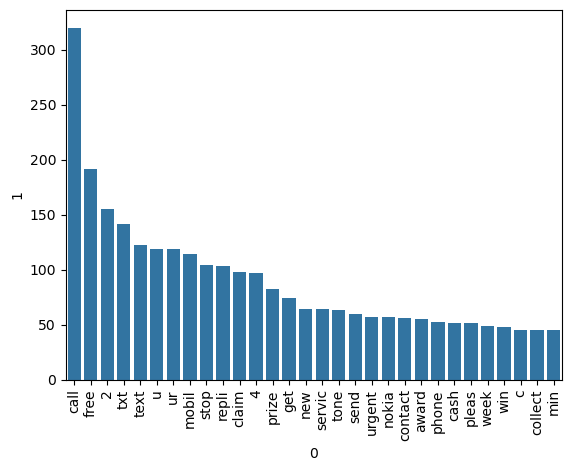

In [138]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [140]:
len(ham_corpus)

35305

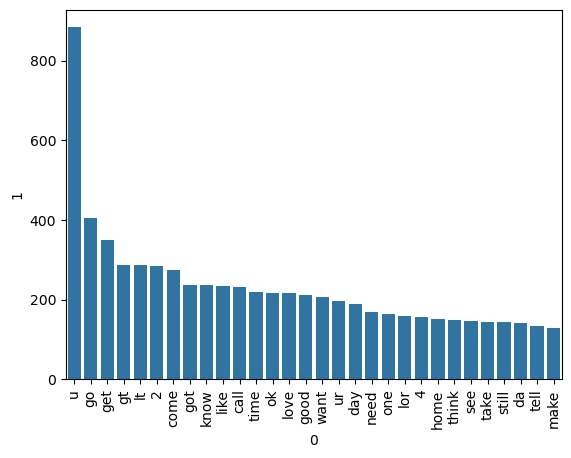

In [141]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [142]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
#####text vectorization
######using bag of words

MODEl BUILDING

In [144]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [145]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [147]:
X.shape

(5169, 3000)

In [148]:
y=df['target'].values

In [149]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [152]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#very bad output obtained

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [155]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# still better

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [156]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# good


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [157]:
# due to imbalance data we prefer accuracy 
# tfidf,mnb used


In [158]:
import pickle

In [159]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))